In [1]:
import sys
sys.path.append('../..')

In [2]:
import gzip
import evidence_features as evf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/uh/projects/expose1/evidence-features/.venv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading pretrained XLM-Roberta, this may take a while...
Loading tokenizer for german-hdt
Loading tagger for german-hdt
Loading lemmatizer for german-hdt
Loading NER tagger for german-hdt
Active language: german-hdt


In [3]:
# read dataset
with gzip.GzipFile('dataset.npy.gz', 'r') as fp:
    y_train = np.load(fp)
    X_train = [np.load(fp) for _ in range(12)]
    y_test = np.load(fp)
    X_test = [np.load(fp) for _ in range(12)]
    xnames = np.load(fp)
    labels = np.load(fp)

In [4]:
# convert to floating point
X_train = evf.i2f(*X_train)
X_test = evf.i2f(*X_test)

In [5]:
%%time
rho = np.corrcoef(X_train, rowvar=False)

CPU times: user 8.12 s, sys: 764 ms, total: 8.88 s
Wall time: 7.1 s


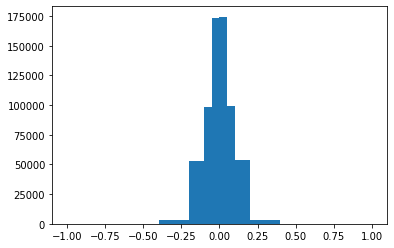

In [6]:
plt.hist(rho[np.triu_indices_from(rho, k=1)], bins=[-1., -.4, -.2, -.1, -.05, 0.0, .05, .1, .2, .4, 1.]);